# AOS_astropy_WCS

Show first an image with rotation: comcam high-latitude in-focus,  where the overlay works

It was made with 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/test_rotang/stars_comCam_PS1_high_focal_rotskypos_30.inst -i comcam -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 24 -w /project/scichris/aos/ps1_phosim/test_rotang/rotskypos -s R22_S01 -o /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/raw > /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/starPhoSim.log 2>&1

and repackaged with 

    
    phosim_repackager.py /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/raw     --out_dir /project/scichris/aos/ps1_phosim/test_rotang/rotskypos/repackaged2 --inst comcam

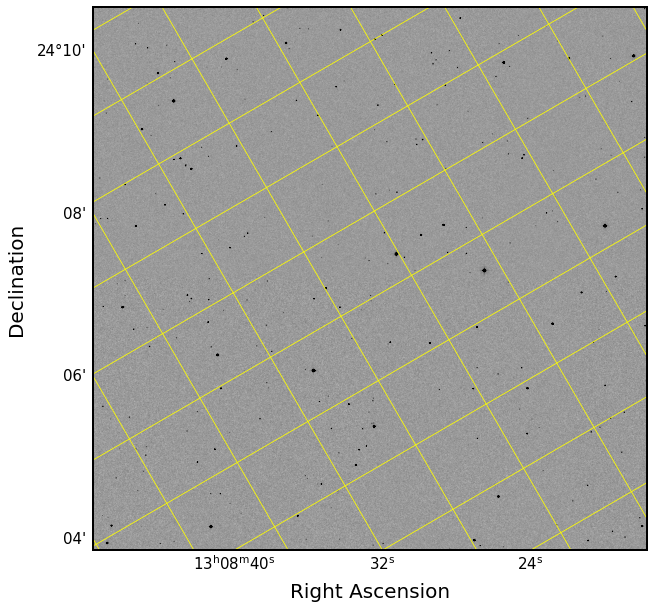

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18
import os
from astropy.wcs import WCS
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()

# path to a post ISR image 
repo_dir = '/project/scichris/aos/ps1_phosim/test_rotang/rotskypos/DATA2/'
file_path = os.path.join(repo_dir, 'run1/postISRCCD/20211231/CC_H_20211231_006002',
        'postISRCCD_LSSTComCam_r_03_CC_H_20211231_006002_R22_S01_run1.fits')

# make a WCS object 
hdul = fits.open(file_path)
wcs1 = WCS(hdul[1].header)


data = hdul[1].data
vmin, vmax = zscale.get_limits(data)


# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs1)
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys',)
ax.grid(color='yellow', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ra = ax.coords['ra']
dec = ax.coords['dec']

ra.set_ticks(spacing=2 * u.arcmin, color='white')
dec.set_ticks(spacing=2 * u.arcmin, color='white')

In [22]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 197.464413  24.335542  
CRPIX : 2037.5  6226.5  
CD1_1 CD1_2  : -2.77777777777784e-05  4.81125224324699e-05  
CD2_1 CD2_2  : 4.81125224324654e-05  2.7777777777778e-05  
NAXIS : 4072  4000

Now show an image with no rotation - no axes visible at all! 

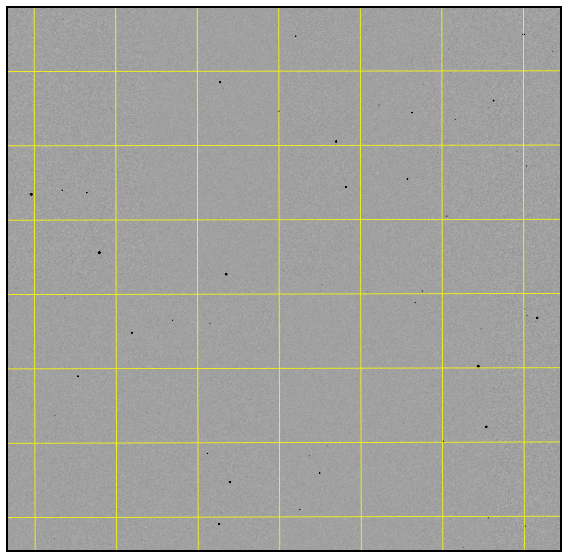

In [41]:
repo_dir = '/project/scichris/aos/ps1_phosim/comCamNoPert/high/focal/DATA/run1/'
file_path = os.path.join(repo_dir, 'postISRCCD/20211231/CC_H_20211231_006002',
                       'postISRCCD_LSSTComCam_r_03_CC_H_20211231_006002_R22_S01_run1.fits')

# make a WCS object 
hdul = fits.open(file_path)
wcs2 = WCS(hdul[1].header)


data = hdul[1].data
vmin, vmax = zscale.get_limits(data)


# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=wcs2)
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys',)
ax.grid(color='yellow', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ra = ax.coords['ra']
dec = ax.coords['dec']

ra.set_ticks(spacing=2 * u.arcmin, color='white')
dec.set_ticks(spacing=2 * u.arcmin, color='white')

ra.set_axislabel('RA', minpad=0.3)
dec.set_axislabel('DEC', minpad=0.3)

show both wcs side by side - they are nearly identical!  So why the second image does not show any axis labels ?? 


In [25]:
wcs1

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 197.464413  24.335542  
CRPIX : 2037.5  6226.5  
CD1_1 CD1_2  : -2.77777777777784e-05  4.81125224324699e-05  
CD2_1 CD2_2  : 4.81125224324654e-05  2.7777777777778e-05  
NAXIS : 4072  4000

In [29]:
wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 197.464413  24.335542  
CRPIX : 2037.5  6226.5  
CD1_1 CD1_2  : 0.0  5.55555555555559e-05  
CD2_1 CD2_2  : 5.55555555555557e-05  0.0  
NAXIS : 4072  4000

To make it even weirder - when I make an image with slight rotation (10 degrees), then only one axis appears:

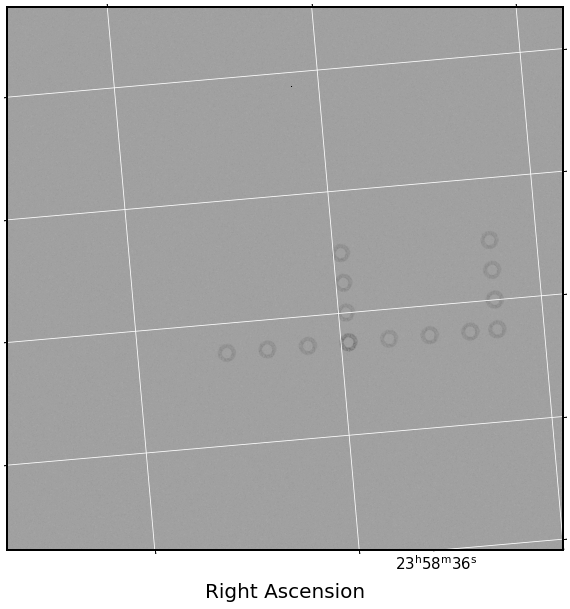

In [37]:
# 15 degrees - insufficient for the declination to appear...
from astropy.wcs import WCS
from astropy.io import fits

repo_dir = '/project/scichris/aos/images/lsstCam/letter_R22_rot2/DATA/'

filename = os.path.join(repo_dir, 'run1/postISRCCD/20160916/MC_H_20160916_006002',
        'postISRCCD_LSSTCam_g_MC_H_20160916_006002_R22_S01_run1.fits')
hdul = fits.open(filename)
wcs = WCS(hdul[1].header)

data = hdul[1].data

# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ra = ax.coords['ra']
dec = ax.coords['dec']

#ra.set_ticks(spacing=2 * u.arcmin, color='white')
#dec.set_ticks(spacing=2 * u.arcmin, color='white')


Now in the above if I set `ra.set_ticks(spacing=2 * u.arcmin, color='white')` , the axis disappears : 

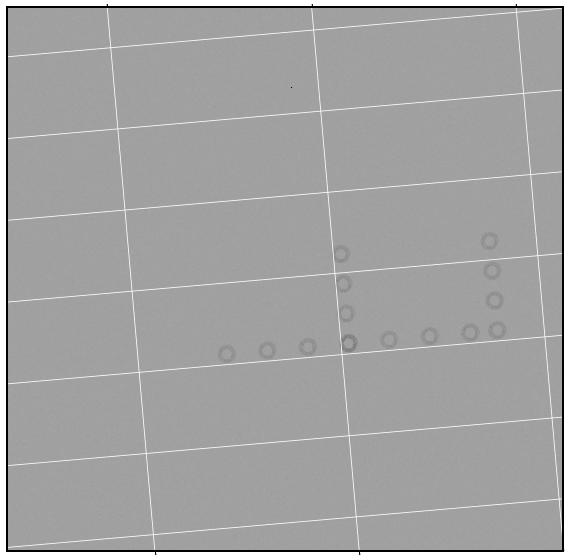

In [38]:
# 15 degrees - insufficient for the declination to appear...
from astropy.wcs import WCS
from astropy.io import fits

repo_dir = '/project/scichris/aos/images/lsstCam/letter_R22_rot2/DATA/'

filename = os.path.join(repo_dir, 'run1/postISRCCD/20160916/MC_H_20160916_006002',
        'postISRCCD_LSSTCam_g_MC_H_20160916_006002_R22_S01_run1.fits')
hdul = fits.open(filename)
wcs = WCS(hdul[1].header)

data = hdul[1].data

# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ra = ax.coords['ra']
dec = ax.coords['dec']

ra.set_ticks(spacing=2 * u.arcmin, color='white')
#dec.set_ticks(spacing=2 * u.arcmin, color='white')


And when I set the other: `dec.set_ticks(spacing=2 * u.arcmin, color='white')`, then both axes appear! 

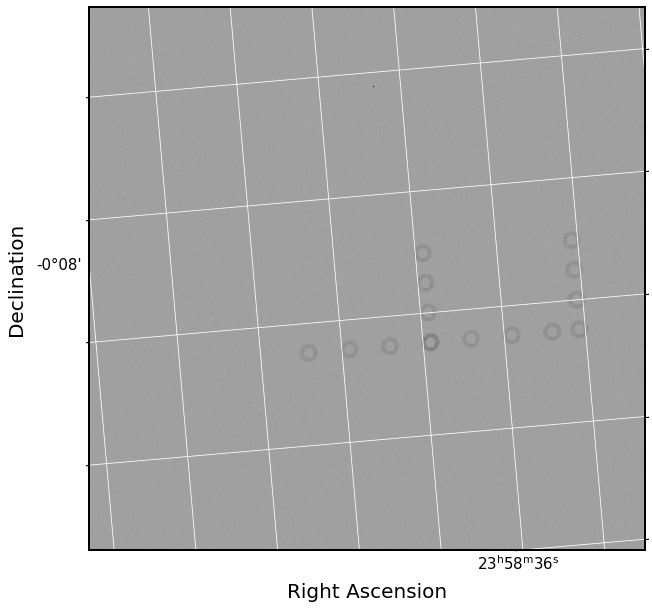

In [39]:
# 15 degrees - insufficient for the declination to appear...
from astropy.wcs import WCS
from astropy.io import fits

repo_dir = '/project/scichris/aos/images/lsstCam/letter_R22_rot2/DATA/'

filename = os.path.join(repo_dir, 'run1/postISRCCD/20160916/MC_H_20160916_006002',
        'postISRCCD_LSSTCam_g_MC_H_20160916_006002_R22_S01_run1.fits')
hdul = fits.open(filename)
wcs = WCS(hdul[1].header)

data = hdul[1].data

# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=wcs)
ax.imshow(data,  origin='lower', vmin=vmin, vmax=vmax,cmap='Greys')
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

ra = ax.coords['ra']
dec = ax.coords['dec']

#ra.set_ticks(spacing=2 * u.arcmin, color='white')
dec.set_ticks(spacing=2 * u.arcmin, color='white')


Really bizzarre! But for the image with no rotation, I still can't get either axis to appear. 